## Proyecto final
### Natali André Julio Beltran - 1098807231

## Oscilaciones del péndulo-muelle.
un sistema oscilante simple, que consiste en una partícula de masa m en el extremo inferior de un muelle elástico de constante k, fijado por el extremo superior. El muelle, inicialmente en equilibrio en posición vertical, se desplaza a una posición (x0, y0) y se suelta.


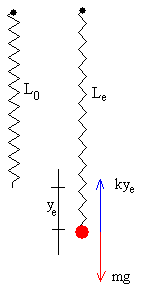
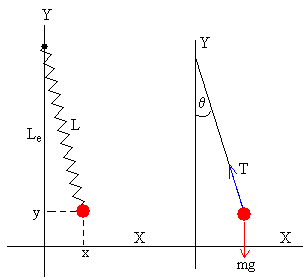

La masa de la partícula $m=300g=0.3 kg$

La longitud del muelle $L_0=1.0 \ m$

La longitud del muelle en la posición de equilibrio es $L_e=4/3 m$

El valor de la constante k es $k=8.82 N/m$

la posicion inicial $x_0= 0.2 \ m, \ y_0= 0.2 \ m$

Cuando los desplazamientos x e y de la posición de equilibrio son pequeños en comparación con la longitud del muelle $L_0$

El sistema de dos ecuaciones diferenciales de segundo orden acopladas queda

$\frac {d^2x}{dt^2}=\lambda x y-w_x^2x$

$\frac {d^2y}{dt^2}=\frac{\lambda}{2} x^2 -w_y^2y$

La frecuencia $w_x$ corresponde a las oscilaciones de un péndulo de longitud Le.

$w_x=\frac{g}{L_e}$

La frecuencia $ω_y$ corresponde a las oscilaciones de una masa m unida a un muelle 
elástico de constante k.

$w_y=\frac{k}{m}$

λ es la constante de proporcionalidad del acoplamiento 

$λ=\frac{k \ L_0}{m \ L_e^2}$

La energía del sistema es:

$E=\frac{1}{2} m(v_x^2+v_y^2)+mgy+\frac{1}{2}k(\sqrt{x^2+(L_e-y)^2}-L_0)^2$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import interpolate
from scipy import optimize
from matplotlib.animation import FuncAnimation

In [2]:
def func(x,t,params):                            #funcion de las ecuaciones diferenciales acopladas 
    
    k = params[0]
    m = params[1]
    l_0 = params[2]
    le =params[3]
    l = np.sqrt((le-x[1])**2+(x[0]**2))
    wx = (9.8 / le)**0.5
    wy = (k/m)**0.5
    lam = (k/m)*(l_0/le**2)

    dxdt = x[2]
    dydt = x[3]
    
    dvxdt = lam*x[0]*x[1]-(wx**2)*x[0]
    dvydt = (lam/2)*x[0]**2-(wy**2)*x[1]
    return[dxdt,dydt,dvxdt,dvydt]
    
    
    
    

In [3]:
                                  # parametros y condiciones iniciales
l_0 = 1                           # longitud del muelle
m = 0.3                           # masa del pendulo
k = 8.82                          # constante k del muelle
le = 4/3                          # longitud del muelle en la posición de equilibrio
x0 = 0.2                          # posicion inicial en x
y0 = 0.2                          # posicion inicial en y
vx0 = 0                           # velocidad incial en x
vy0 = 0                           # velocidad inicial en y

params=[k,m,l_0,le]               # lista de parametros

ci = np.array([x0,y0,vx0,vy0])    # lista de condiciones iniciales

In [4]:
t = np.linspace(0,10,1000)                #linspace del tiempo de 0 a 10 seg             
sol = odeint(func,ci,t,args = (params,))  #odeint que devuelve la pocion x e y,  y las velocidades vx,vy


In [5]:
x = sol[:,0]     #posicionesen x
y = sol[:,1]     #posiciones en y
vx = sol[:,2]    #velocidades en x
vy = sol[:,3]    #velocidades en y

## Grafica de la posicion x en funcion del tiempo:

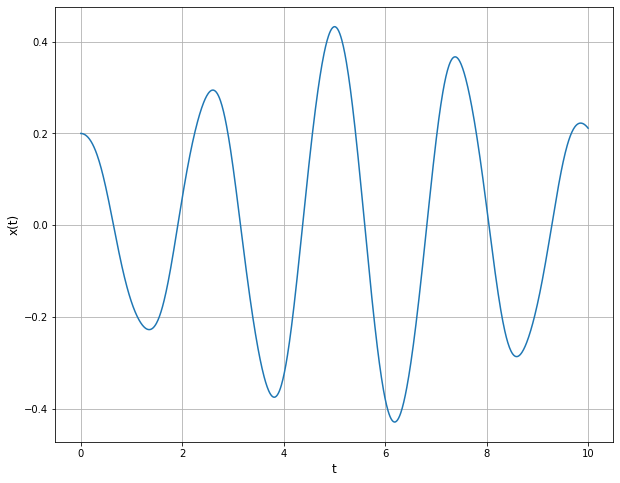

In [6]:
fig3 = plt.figure(figsize=(10,8))
plt.plot(t,x)                        # grafica posicion x en funcion del tiempo
plt.xlabel("t",size=12)              #nombre del eje x
plt.ylabel("x(t)",size=12)           #nombre del eje y
plt.grid()

## Grafica de la posicion y en funcion del tiempo:

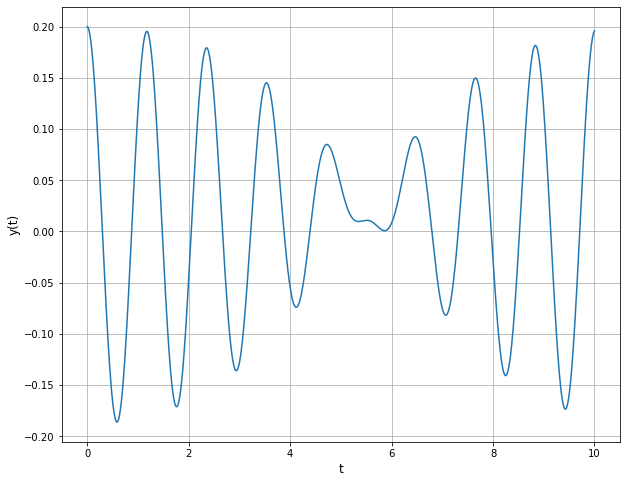

In [7]:
fig4 = plt.figure(figsize=(10,8))
plt.plot(t,y)                     # grafica posicion y en funcion del tiempo
plt.xlabel("t",size=12)           #nombre del eje x
plt.ylabel("y(t)",size=12)        #nombre del eje y
plt.grid()

## Grafica de movimiento de la particula en el tiempo t:

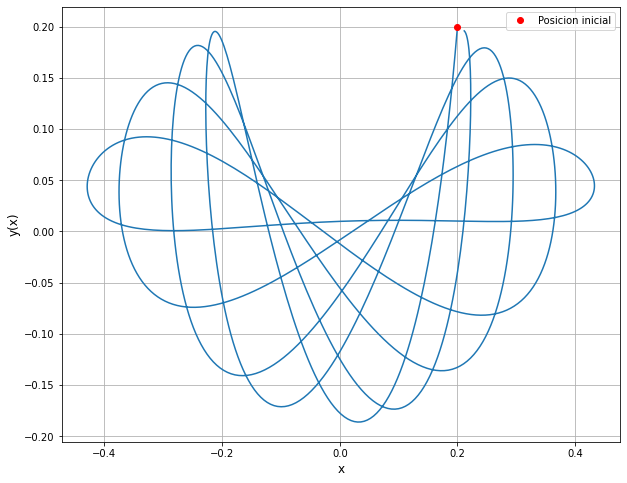

In [8]:
fig1 = plt.figure(figsize=(10,8))               # grafica de posicion
plt.plot(x,y)                                   # posicion en funcion de x
plt.plot(x0,y0,"ro",label="Posicion inicial")
plt.xlabel("x",size=12)                         # nombre del eje x
plt.ylabel("y(x)",size=12)                      # nombre del eje y
plt.legend()
plt.grid()

### Magnidud del vector posición: Distancia.

$r=\sqrt{x^2+y^2}$

In [9]:
r = []                                 #lista vacia donde se guardan las magnitudes del vetor posicion


for i in range(0,len(t)):              # for para calcular las magnitudes del vector posicion 
  v = (x[i]**2+y[i]**2)**0.5
  r.append(v)

r=np.array([r])                        #convierte la lista en un arreglo para poder hacer la interpolacion

In [10]:
R_t = interpolate.interp1d(t,-r[0])    # Polinomio de interpolación para la distancia  en función del tiempo

t_Rmax = optimize.fminbound(R_t,4,6)   # Tiempo en el que se alcanza la distancia maxima

Rmax = abs(R_t(t_Rmax))                #distancia maxima  



## Grafica de la distancia en funcion del tiempo:




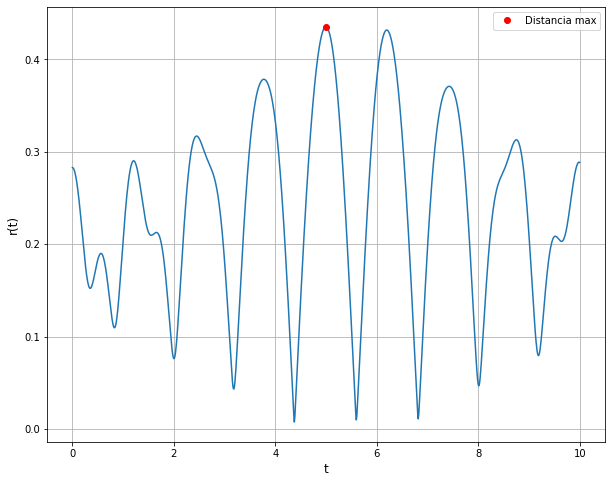

In [11]:
fig2 = plt.figure(figsize=(10,8))
plt.plot(t,r[0])                                  #grafica de la magnitud del vector posicion en funcion del tiempo: distacia
plt.plot(t_Rmax,Rmax,"ro",label="Distancia max")
plt.xlabel("t",size=12)                           #nombre del eje x
plt.ylabel("r(t)",size=12)                        #nombre del eje y
plt.legend()
plt.grid()



## Grafica velocidad en x en funcion del tiempo:

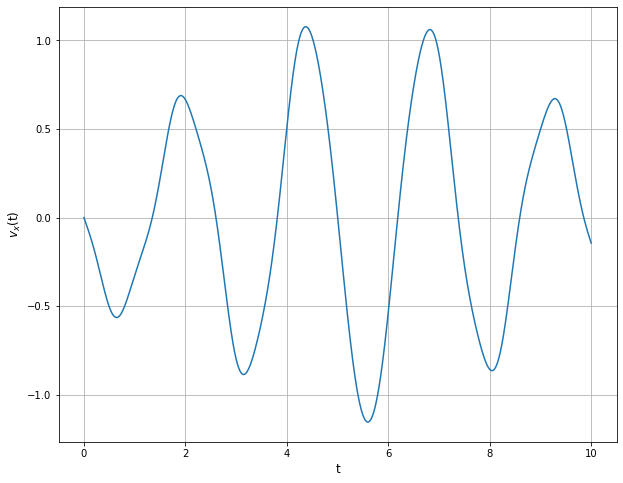

In [12]:
fig5 = plt.figure(figsize=(10,8))
plt.plot(t,vx)                     # grafica de la velocidad en x en funcion del tiempo
plt.xlabel("t",size=12)            # nombre del eje x
plt.ylabel("$v_x$(t)",size=12)     # nombre del eje y
plt.grid()

## Grafica velocidad en y en funcion del tiempo:

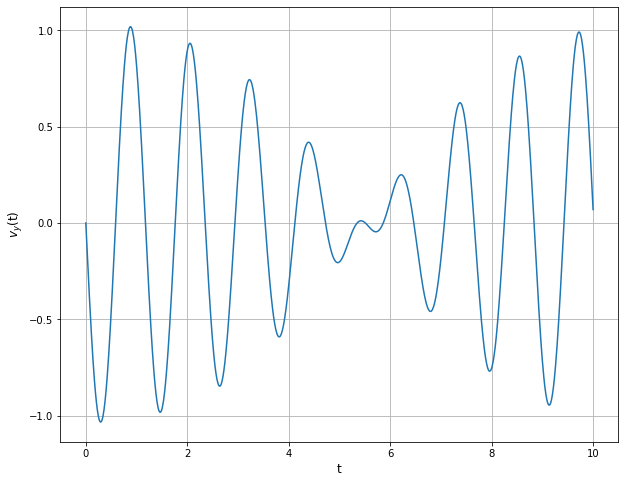

In [13]:
fig5 = plt.figure(figsize=(10,8))
plt.plot(t,vy)                     # grafica de la velocidad en y en funcion del tiempo
plt.xlabel("t",size=12)            # nombre del eje x
plt.ylabel("$v_y$(t)",size=12)     # nombre del eje y
plt.grid()

### Magnitud vector velocidad:Rapidez

$V=\sqrt{v_x^2+v_y^2}$

In [14]:
def f2(vx,vy):                          #funcion magnitudes del vector velocidad
  v=(vx**2+vy**2)**0.5
  return(v)

In [15]:
V=f2(vx,vy)                             #magnitudes del vector velocidad

In [16]:
V_t = interpolate.interp1d(t,-V)        # Polinomio de interpolación 

t_Vmax = optimize.fminbound(V_t,4,5)    # Tiempo en el que se alcanza la velocidad maxima maxima

Vmax = abs(V_t(t_Vmax))                 #velocidad maxima      


## Grafica de la rapidez en funcion del tiempo:

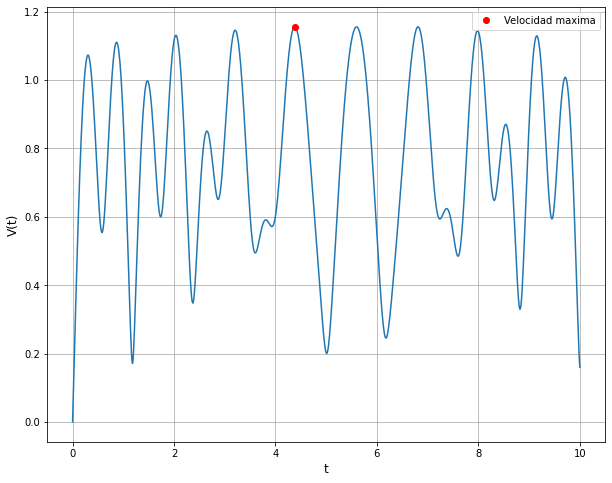

In [17]:
fig66 = plt.figure(figsize=(10,8))
plt.plot(t,V)                                        # grafica magnitudes de los vectores velocidad en funcion del tiempo
plt.plot(t_Vmax,Vmax,"ro",label="Velocidad maxima")
plt.xlabel("t",size=12)                              #nombre del eje x
plt.ylabel("V(t)",size=12)                           #nombre del eje y
plt.legend()
plt.grid()

### Energía del sistema
La energía del sistema es:

$E=\frac{1}{2} m(v_x^2+v_y^2)+mgy+\frac{1}{2}k(\sqrt{x^2+(L_e-y)^2}-L_0)^2$

In [18]:
def f (x,y,vx,vy):                                                           #funcion de la energia del sistema
  E= (1/2)*m*(vx**2+vy**2)+m*9.8*y+(1/2)*k*((x**2+(le-y)**2)**0.5-l_0)**2
  return(E)

In [19]:
energia=f(x,y,vx,vy)                                                         # arreglo de energia del sistema 


In [20]:
E_t = interpolate.interp1d(t,-energia)                                       # Polinomio de interpolación para la energia  en función del tiempo

t_Emax = optimize.fminbound(E_t,4,6)                                         # Tiempo en el que se alcanza la energia maxima

Emax = abs(E_t(t_Emax))                                                      #energia maxima



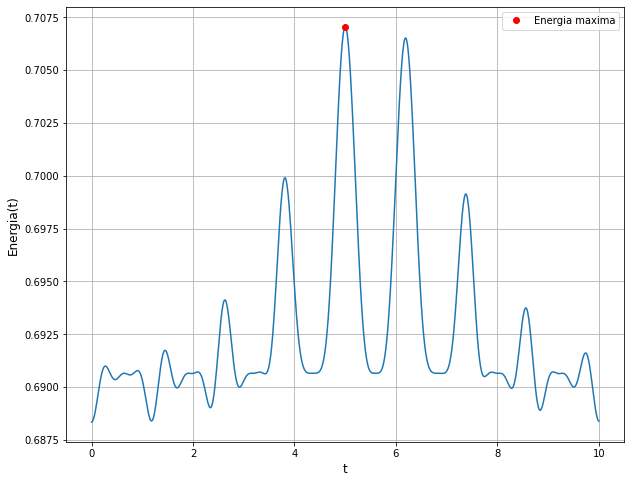

In [21]:
fig1 = plt.figure(figsize=(10,8))
plt.plot(t,energia)                                   # grafica de energia en funcion del tiempo
plt.plot(t_Emax,Emax,"ro",label="Energia maxima")
plt.xlabel("t",size=12)                               #nombre del eje x
plt.ylabel("Energia(t)",size=12)                      #nombre del eje y
plt.legend()
plt.grid()


In [22]:
df=pd.DataFrame()

df["Resultados"]=["Energia Max[J]","Velocidad Max[m/s]","Distancia Max[m]"]
df["valores Max"] = [Emax,Vmax,Rmax]
df["tiempo[s]"]=[t_Emax,t_Vmax,t_Rmax]




## Resultados

In [23]:
df

,Resultados,valores Max,tiempo[s]
0,Energia Max[J],0.707057,5.005004
1,Velocidad Max[m/s],1.155915,4.384381
2,Distancia Max[m],0.435180,4.994998


### Conclusiones
1.Se implementó un codigo en lenguaje de programación python para la solución de ecuaciones diferenciales de primer orden acopladas; Resolviendo así para el sistema la ecuación y de velocidades usando la función de scipy ODEINT.

2.Se grafico, la velocidad, posición y energía del sistema con es uso de la librería Matplot lib.

3.La velocidad maxima del sistema fué 1.155915[m/s], la energia maxima, 0.707057[J] y la distancia maxima 0.435180[m] y se determino con el uso de la funcion de interpolación de scipy interp1d

4.se obserba que el sistema se comporta diferente a un pendulo simple, las posiciones en x e y no son periodicas como en un pendulo simple



### Referencias

Rusbridge M.G., Motion of the sprung pendulum. Am. J. Phys. 48 (2) February 1980, pp. 146-151.

Olsson M. G. Why does a mass on a spring sometimes misbehave?. Am. J. Phys. 44 (12) December 1976, pp. 1211-1212.

